# BIG CRAZY ADJUSTMENT 2.0 4X4 TURBO DIESEL FULL POWER SAYAJIN

Hello people, today I'll explain how we did our logistic adjustment for the data obtained reggarding the categorization of faces. There are 2 main ways to do it:

1) We use a full deterministic algorithm based on minimization of the error between the adjusted curve and the data points

2) We make use of statistical distributions to acquire the most probable value for each parameter inside our curve

We'll be using the second, it's more appropriate to our scenario. Since our dataset is based on data retrived for a population of individuals, it's resonable to expect that each individual will behave in an unique way. Therefore, when considering the total population, we most likely will find a most repeated value for a given parameter measured, that is, a value that is most probable for a individual to have. However, some other parameters might still be found. That situation gives us a parameter distribution, configuring a probability distribution function for our measured parameter. That's way a statistical approach is better.

Now, we will starting setting up the code, the algorithm used for this fitting will be the ABC rejection. ABC stands for Approximate Bayesian Computation, the algorithm takes a prior distribution (which we must choose), than it takes $N$ trials of random numbers given by that specifically distribution. After drawing a specific number, it computes the curve with that number being our parameter (or parameters, if we give more than one adjustable parameter and more than one prior) and checks the error, that is, the distance between a point in the generated curve and the actual data point. If that error is lower than a specific value (given by $\epsilon$, which we also choose), than that value is taken as a possible. After the $N$ trials, we get a distribution of the most accepted values, and the most probable value that explain the data.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
url = 'https://raw.githubusercontent.com/PedroHPCintra/ValedaEstranhezaZikadaGalera/master/MulheresFacesmas.txt'
Dados = pd.read_csv(url)
Dados.head(5)

url2 = 'https://raw.githubusercontent.com/PedroHPCintra/ValedaEstranhezaZikadaGalera/master/ErrMulheresFacesmas.txt'
DadosErr = pd.read_csv(url2)
DadosErr.head(5)

,Erro Mulheres Faces Masculinas
0,0.012881
1,0.012881
2,0.017554
3,0.049171
4,0.068508


Text(0, 0.5, 'Categorização como real')

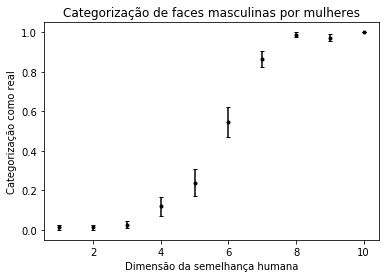

In [3]:
MfaceH = Dados.values.ravel()
Erro = DadosErr.values.ravel()
DimH = np.linspace(1, 10, 10)
plt.title('Categorização de faces masculinas por mulheres')
plt.plot(DimH, MfaceH, 'k.')
plt.errorbar(DimH, MfaceH, fmt = 'none', yerr = Erro, capsize = 2, color = 'black')
plt.xlabel('Dimensão da semelhança humana')
plt.ylabel('Categorização como real')

The logistic function has the following mathematical formula:

$$f(x) = \frac{A}{1 + e^{-B(x-C)}},$$

the parameters $A$, $B$, $C$ define the shape of our logistic curve and will be the free parameters for fitting. $A$ tells us the height of the curve, that is, the $y$ value to where the function approaches, $B$ yields the slope of the increase, and finally $C$ gives us the displacement of the curve.

In [ ]:
Dados = MfaceH

tDados = DimH

confidence = 0.95

def sig(t, A, B, C):
    return A/(1 + np.exp(-B*(t - C)))


postA = []
postB = []
postC = []

for i in range(10000000):

    A = np.random.normal(100, 1)
    B = np.random.uniform(0, 4)
    C = np.random.uniform(0, 10)
    

    if (np.sqrt(np.sum((Dados-sig(tDados, A, B, C))**2))/10 < 1):

        postA.append(A)
        postB.append(B)
        postC.append(C)


paramA = np.median(postA)
paramB = np.median(postB)
paramC = np.median(postC)
paramBetaerr = np.std(postA)

n = len(postA)
std_err = stats.sem(postA)
h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
startbeta = paramA - h
endbeta = paramA + h
print('A:',paramA)
print ('A 95% confidence:','(',startbeta, endbeta,')')
m = len(postB)
std_err = stats.sem(postB)
h = std_err * stats.t.ppf((1 + confidence) / 2, m - 1)
startgamma = paramB - h
endgamma = paramB + h
print('B:',paramB)
print ('B 95% confidence:','(',startgamma, endgamma,')')
k = len(postC)
std_err = stats.sem(postC)
h = std_err * stats.t.ppf((1 + confidence) / 2, k - 1)
startN = paramC - h
endN = paramC + h
print('C:',paramC)
print ('C 95% confidence:','(',startN, endN,')')

t = np.linspace(0,10,100)

plt.scatter(tDados, Dados, 'k.', label = 'Data')
plt.plot(t, sig(t, paramA, paramB, paramC),'b-', label = 'Logistic adjustment')
plt.errorbar(tDados, Dados, fmt = 'none', yerr = Erro, capsize = 2, color = 'black')
plt.xlabel('Dimension of Human Likeness')
plt.ylabel('Categorized as Real')
plt.title('Men categorizing male faces')
plt.legend(loc='best')

plt.hist(postB, 40, density=True)
plt.hist(postA, 30, density=True)
plt.hist(postC, 30, density=True)

def lognormal(x, mean, std):
    return 1/(x*std*np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mean)**2 /(2*std**2))

bin_heights, bin_borders, _ = plt.hist(postB, bins=40, label='Probability density', density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, pcov = curve_fit(lognormal, bin_centers, bin_heights, p0=[1, 1])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, lognormal(x_interval_for_fit, *popt), label='Log-normal fit')
plt.xlabel('Slope value')
plt.ylabel('Probability density')
plt.title('Men categorizing male faces')
plt.legend()

If you have any doubt reggarding this code, please e-mail me at pedrohpc96@hotmail.com with the subject GITHUB CODE UNCANNY VALLEY

# That's all folks